In [3]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from db_initialize import *
# here we assume that database.db only contains data from healingwell
engine = create_engine('sqlite://///Users/Johnson/Documents/nit/thesis/forum_crawler/database.db')
Session = sessionmaker(bind=engine)
Base.metadata.bind = engine
session = Session()

In [2]:
import re
def word_count(doc):
    count = len(re.findall(r'\w+', doc))
    return count

In [10]:
thread = session.query(Thread).all()
#print(len(thread.posts))
for x in range(1,20):
    print("Word Count: %d" % word_count(thread[x].body))
    print(thread[x])
    #print(len(thread[x].posts))

Word Count: 487

Title: Cheaper version of pricey prostate cancer drug. 
User: FoxRun 
Time: 2016-08-31 18:54:00 
Posts: 3
URL: http://www.healingwell.com/community/default.aspx?f=35&m=3693749 
Biolyse Pharma stymied in effort to make cheaper version of pricey prostate cancer drug.

A small Canadian company has waded into a U.S. drug price controversy by offering to make an expensive prostate cancer drug for a fraction of the price.Right now Xtandi costs U.S. patients as much as $129,000 US a year, or about $90 per pill. St. Catharines, Ont.-based Biolyse Pharma says it can make the drug for $3 a pill, or $4,400 per year, but has so far been unable to get U.S. health authorities to override the existing patent.Biolyse Pharma initially made the offer to make a cheaper version of Xtandi (enzalutamide) to the U.S. government in April. The issue resurfaced last week after pharmaceutical giant Pfizer announced it will pay $14 billion US to buy Medivation, the makers of the drug, primarily o

In [3]:
#total number of users
num_users = session.query(User).count()
print("Total number of users: %d" % num_users)
#total number of threads
num_threads = session.query(Thread).count()
print("Total number of threads: %d" % num_threads)
#total number of posts
num_posts = session.query(Post).count()
print("Total number of posts: %d" % num_posts)

Total number of users: 6415
Total number of threads: 28922
Total number of posts: 343995


In [4]:
users = session.query(User).all()

In [5]:
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib2tikz import save as tikz_save
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

In [7]:
user_threads = np.array([len(user.threads) for user in users])

In [12]:
user_posts = np.array([len(user.posts)+len(user.threads) for user in users])

file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec}
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


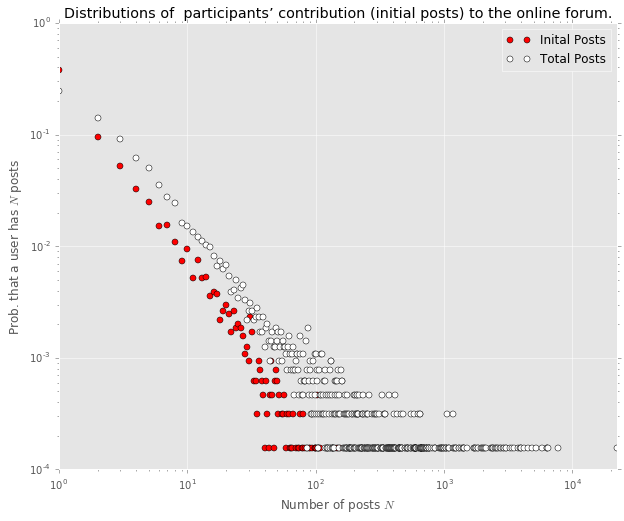

In [23]:
ini_bincount = np.bincount(user_threads)
ini_prob = ini_bincount / len(user_threads)
total_bincount = np.bincount(user_posts)
total_prob = total_bincount / len(user_posts)
style.use('ggplot')
plt.yscale('log')
plt.xscale('log')
plt.title('Distributions of  participants’ contribution (initial posts) to the online forum.')
plt.xlabel(r'Number of posts $N$')
plt.ylabel(r'Prob. that a user has $N$ posts')
plt.plot(np.arange(len(ini_prob)), ini_prob, 'ro', label='Inital Posts')
plt.plot(np.arange(len(total_prob)), total_prob, 'wo', label='Total Posts')
plt.xlim([-0.1, max(user_posts)])
plt.legend()
plt.grid(True)

#plt.show()
tikz_save('test.tex')

In [3]:
threads = session.query(Thread).all()

In [15]:
num_thread = session.query(Thread).count()
thread_posts = np.empty([1, num_thread],dtype="int32")
print(thread_posts)
#thread_posts = np.array([len(thread.posts) for thread in threads])
for i in range(1, num_thread+1):
    thread = session.query(Thread).get(i)
    thread_posts[0,i-1] = len(thread.posts)
    if i%50==0:
        print("%d/%d" % (i,num_thread))

[[0 0 0 ..., 0 0 0]]
50/28922
100/28922
150/28922
200/28922
250/28922
300/28922
350/28922
400/28922
450/28922
500/28922
550/28922
600/28922
650/28922
700/28922
750/28922
800/28922
850/28922
900/28922
950/28922
1000/28922
1050/28922
1100/28922
1150/28922
1200/28922
1250/28922
1300/28922
1350/28922
1400/28922
1450/28922
1500/28922
1550/28922
1600/28922
1650/28922
1700/28922
1750/28922
1800/28922
1850/28922
1900/28922
1950/28922
2000/28922
2050/28922
2100/28922
2150/28922
2200/28922
2250/28922
2300/28922
2350/28922
2400/28922
2450/28922
2500/28922
2550/28922
2600/28922
2650/28922
2700/28922
2750/28922
2800/28922
2850/28922
2900/28922
2950/28922
3000/28922
3050/28922
3100/28922
3150/28922
3200/28922
3250/28922
3300/28922
3350/28922
3400/28922
3450/28922
3500/28922
3550/28922
3600/28922
3650/28922
3700/28922
3750/28922
3800/28922
3850/28922
3900/28922
3950/28922
4000/28922
4050/28922
4100/28922
4150/28922
4200/28922
4250/28922
4300/28922
4350/28922
4400/28922
4450/28922
4500/28922
4550/2892

In [14]:
threads = session.query(Thread).all()
num_thread = session.query(Thread).count()
thread_posts = np.empty([1, num_thread],dtype="int32")
print(thread_posts)
#thread_posts = np.array([len(thread.posts) for thread in threads])
for thread in threads:
    #thread = session.query(Thread).get(i)
    thread_posts[0,i-1] = len(thread.posts)
    print("%d/%d" % (thread.id,num_thread))

[[         0 1342177280          0 ...,          1  472735696          1]]
1/28922
2/28922
3/28922
4/28922
5/28922
6/28922
7/28922
8/28922
9/28922
10/28922
11/28922
12/28922
13/28922
14/28922
15/28922
16/28922
17/28922
18/28922
19/28922
20/28922
21/28922
22/28922
23/28922
24/28922
25/28922
26/28922
27/28922
28/28922
29/28922
30/28922
31/28922
32/28922
33/28922
34/28922
35/28922
36/28922
37/28922
38/28922
39/28922
40/28922
41/28922
42/28922
43/28922
44/28922
45/28922
46/28922
47/28922
48/28922


KeyboardInterrupt: 

In [16]:
np.save('thread_posts', thread_posts)

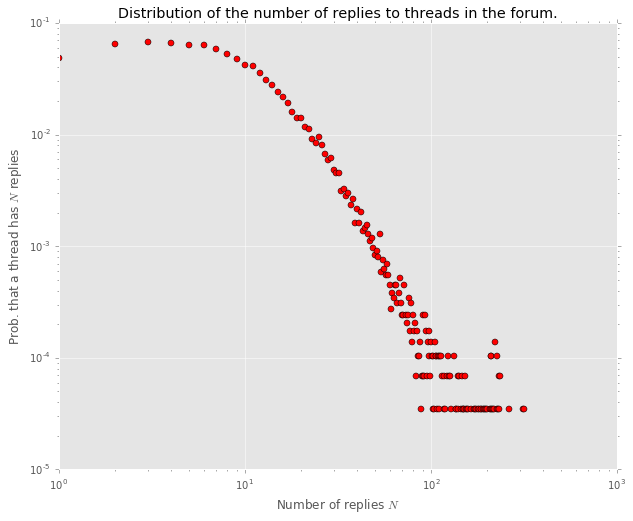

In [18]:
post_bincount = np.bincount(np.squeeze(thread_posts))
post_prob = post_bincount / len(threads)
style.use('ggplot')
plt.yscale('log')
plt.xscale('log')
plt.title('Distribution of the number of replies to threads in the forum.')
plt.xlabel(r'Number of replies $N$')
plt.ylabel(r'Prob. that a thread has $N$ replies')
plt.plot(np.arange(len(post_prob)), post_prob, 'ro')
#plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# function to get time span in hours
from datetime import datetime
def get_time_span(thread):
    #post_timestamps = np.array([post.timestamp for post in thread.posts], dtype='datetime64')
    # assume the last post in thread.posts is the last reply
    thread_time = datetime.strptime(thread.timestamp, '%Y-%m-%d %H:%M:%S')
    last_reply_time = datetime.strptime(thread.posts[-1].timestamp, '%Y-%m-%d %H:%M:%S')
    time_delta = last_reply_time - thread_time
    print(time_delta)
    #calculate the time span in hours
    time_span = 24*int(time_delta.days) + time_delta.seconds//3600
    return time_span

In [ ]:
thread_time_spans = np.array([get_time_span(thread) for thread in threads])

In [19]:
thread_time_spans = np.load('thread_timespan.npy')

In [48]:
thread_time_spans[0]
thread_time_spans.shape
negative = thread_time_spans<0
thread_time_spans[thread_time_spans<0] += 12
np.sum(thread_time_spans<0)
#thread_time_spans[thread_time_spans<0]
ok,problems = np.where(thread_time_spans<0)
print(problems)
for i in range(len(problems)):
    thread = session.query(Thread).get(problems[i]+1)
    print(problems[i]+1)
    print(thread.url)

[  504  2267  2649  2651  2654  2659  2660  2670  6158  6163  6179  6182
  6183  6209  6229  9548  9565  9567  9571  9572  9578  9581  9688 12850
 13130 13132 13133 13137 13153 16897 16909 16914 16923 16929 16943 20220
 20223 20225 20230 20232 20233 20234 20235 20238 20250 20251 20258 20261
 20267 20284 20285 20414 23794 23795 23797 23798 23805 23807 23824 23825
 23838 25637 25746 26403 26420 26440 27595 27976 28274 28885]
505
http://www.healingwell.com/community/default.aspx?f=35&m=1582202
2268
http://www.healingwell.com/community/default.aspx?f=35&m=2503636
2650
http://www.healingwell.com/community/default.aspx?f=35&m=3489377
2652
http://www.healingwell.com/community/default.aspx?f=35&m=3489477
2655
http://www.healingwell.com/community/default.aspx?f=35&m=3488716
2660
http://www.healingwell.com/community/default.aspx?f=35&m=3489631
2661
http://www.healingwell.com/community/default.aspx?f=35&m=3488533
2671
http://www.healingwell.com/community/default.aspx?f=35&m=3489489
6159
http://ww

In [20]:
timespan_bincount = np.bincount(np.squeeze(thread_time_spans))
timespan_prob = timespan_bincount / len(threads)
style.use('ggplot')
plt.yscale('log')
plt.xscale('log')
plt.title('Distribution of the time span of threads in the forum.')
plt.xlabel(r'Life span $T$ of a thread (in hours)')
plt.ylabel(r'Prob. that a thread has a life span of $T$ hours')
plt.plot(np.arange(len(timespan_prob)), timespan_prob, 'ro')
plt.legend()
plt.grid(True)

plt.show()

ValueError: The first argument of bincount must be non-negative